# 데이터 분석 및 시각화

유튜브 메인 페이지 “탐색/인기" 섹션에서 기초한 데이터셋   
특정 기간동안의 동영상 트렌드 기록/연구 및 데이터를 다양한 관점으로 관찰하고 인사이트를 도출하는데 사용됨.   
주어진 데이터셋은 유튜브에서 인기 동영상으로 선택된 비디오 기준으로 가공 하루에 한번씩 수집되었음  
각각의 비디오가 인기 동영상에 처음 포착된 시점과 사라진 시점의 데이터가 기록 되어 있음   

---

문제 (해당 과제에 대한 정답은 없습니다)  
**Q1**. 데이터 타입별 시각화 (자유양식)  
 ◦ 전체기간 카테고리->채널->비디오 개수   
 ◦ 월별 카테고리->채널->비디오 개수   
 ◦ 월별 TOP10 채널 (분류 기준은 비디오 개수)   
 ◦ 주별 TOP5 채널 (분류 기준은 비디오 개수)   
 ◦ 월별 카테고리별 태그 키워드 순위   
   

**Q2**. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표 들이 있음   
ex) views, likes, dislikes, comments,...   
비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.   
  

**Q3**. Q1, Q2의 답을 자유양식으로 작성 후 PDF로 변환하여 첨부   
(영어로 작성 선호하지만 선택 사항임) 


In [ ]:
# 한글 깨짐 현상 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
import pandas as pd
import numpy as np

In [4]:
# 과제2
df = pd.read_csv("/content/pretest_data.csv")

print(df.shape)
df.head()

(2644, 25)


,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


In [5]:
print("집계 기간 :", df['on_trending_date'].min(), "~", df['off_trending_date'].max())

집계 기간 : 2021-03-27 ~ 2021-07-31


In [6]:
# 결측치 확인
pd.DataFrame(df.isnull().sum(), columns=['결측치'])

# tags와 description은 없어도 상관이 없기 때문에 따로 처리를 안함

,결측치
video_id,0
channel_id,0
published_date,0
category_name,0
duration,0
tags,370
description,40
on_trending_date,0
off_trending_date,0
on_rank,0


In [7]:
# 중복값 확인
df.duplicated().sum()

0

In [8]:
# 날짜 컬럼 타입이 object이므로 datetime 형태로 변경
df[['published_date', 'on_trending_date', 'off_trending_date']].dtypes

published_date       object
on_trending_date     object
off_trending_date    object
dtype: object

In [9]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['on_trending_date'] = pd.to_datetime(df['on_trending_date'])
df['off_trending_date'] = pd.to_datetime(df['off_trending_date'])

In [10]:
# 전체기간 카테고리->채널->비디오 개수

print(df['category_name'].unique())

['Entertainment' 'Sports' 'Music' 'People & Blogs' 'Science & Technology'
 'Education' 'Howto & Style' 'News & Politics' 'Gaming' 'Comedy'
 'Pets & Animals' 'Travel & Events' 'Film & Animation' 'Autos & Vehicles'
 'Nonprofits & Activism']


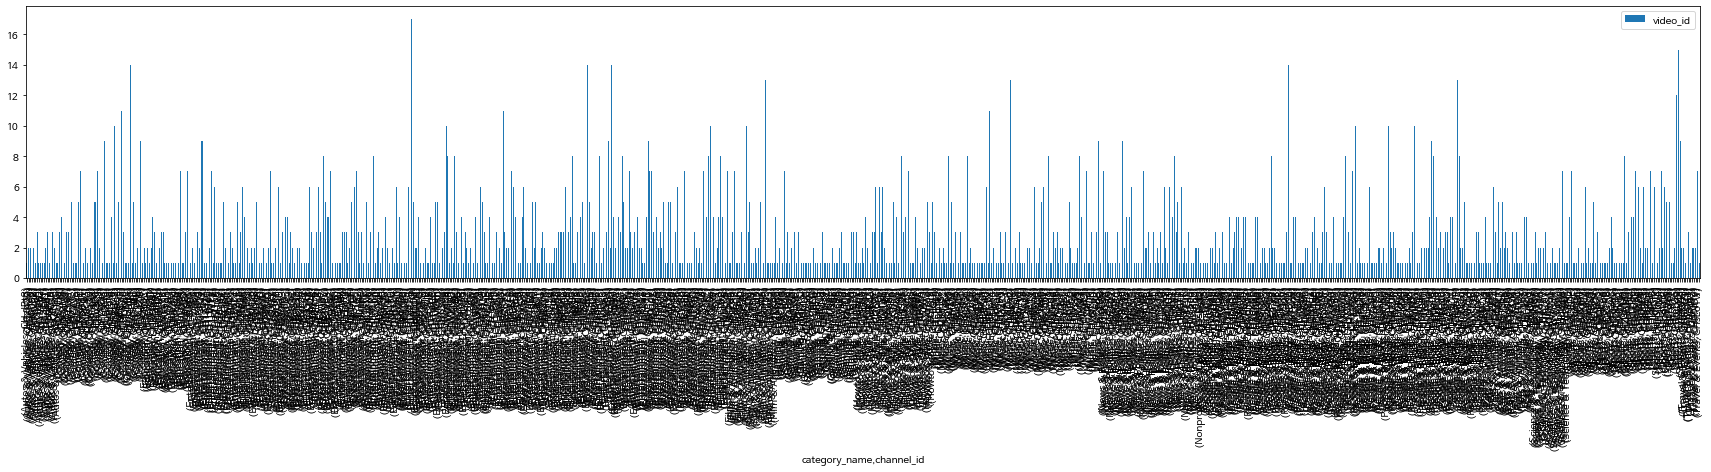

In [11]:
# x축을 확인하기 어렵지만 한 그래프에 나타내려면 방법이 없었음

df.groupby(['category_name', 'channel_id'])[['video_id']].count().plot(kind='bar', figsize=(30,5))

In [12]:
# 월별 카테고리->채널->비디오 개수
# 월별은 유튜브 업로드 날짜를 기준으로 잡음

df['month'] = df['published_date'].dt.month

In [13]:
def question2(month):
  data = df[df['month'] == month].groupby(['category_name', 'channel_id'])['video_id'].count()
  data.plot(kind='bar', figsize=(30, 5), title = f'{month}월', yticks=np.arange(0, max(data)+1))

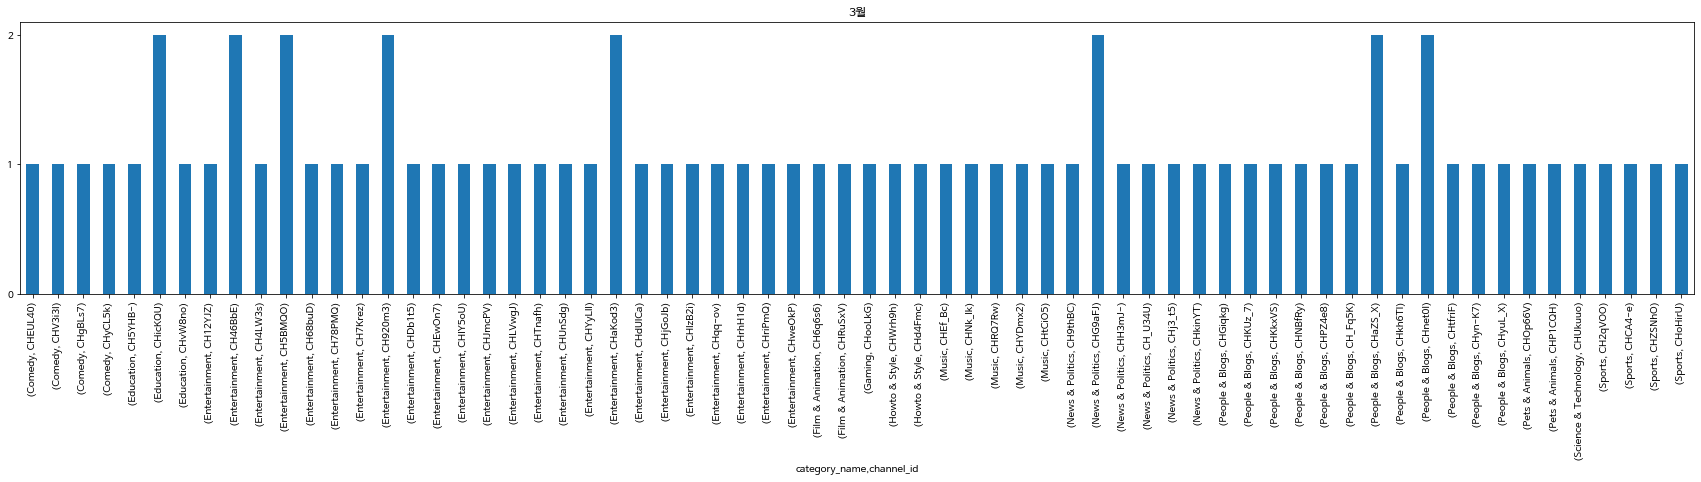

In [14]:
question2(3)

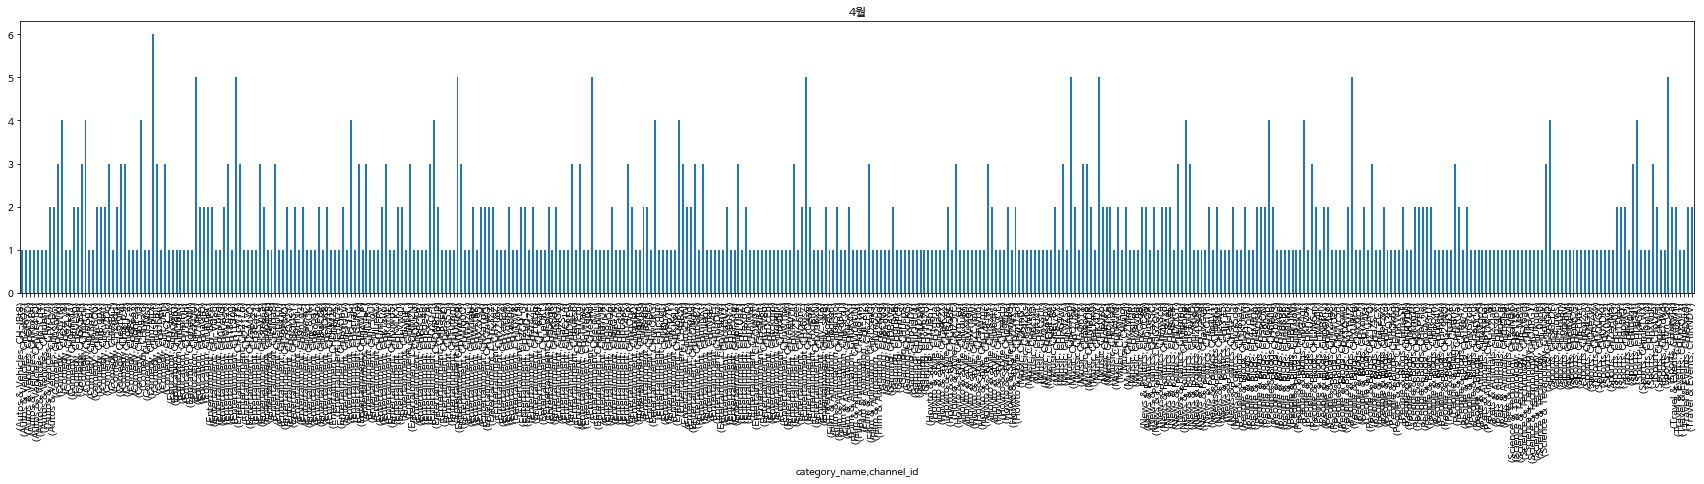

In [15]:
question2(4)

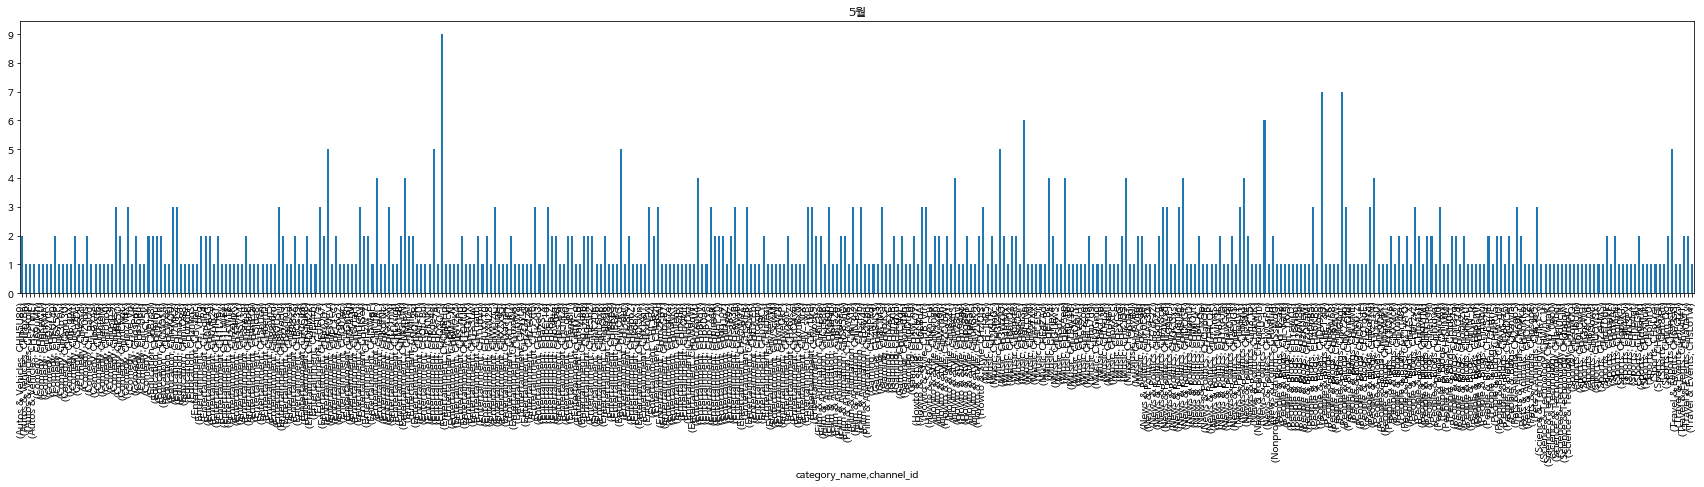

In [16]:
question2(5)

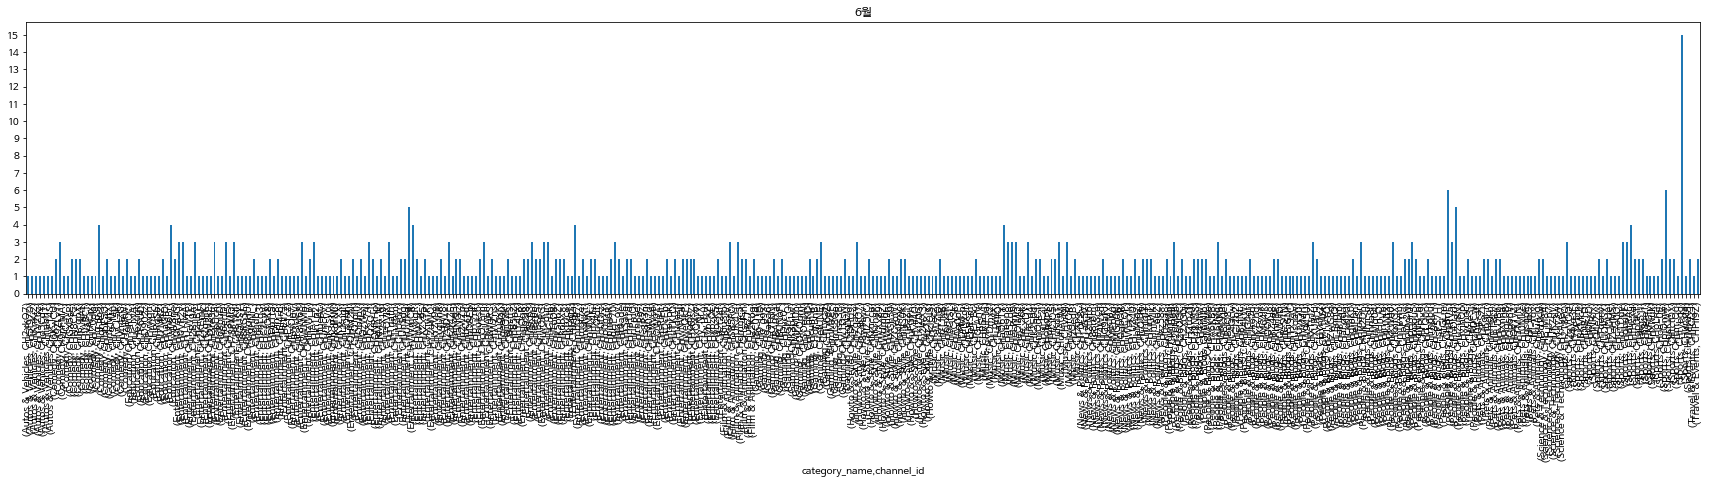

In [17]:
question2(6)

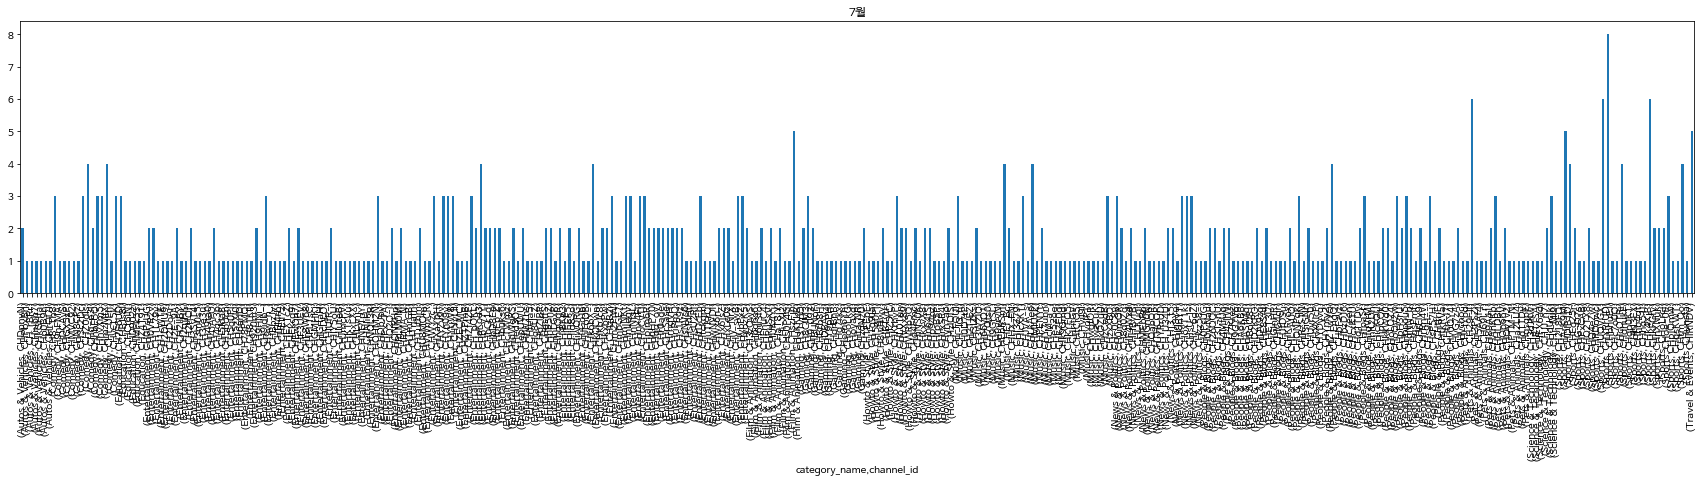

In [18]:
question2(7)

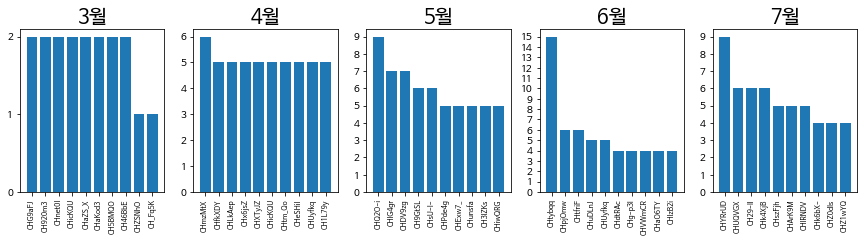

In [19]:
# 월별 TOP10 채널 (분류 기준은 비디오 개수)

plt.figure(figsize=(15, 3))
for i in range(3, 8):
  idx = df[df['month'] == i].groupby(['channel_id'])['video_id'].count().sort_values(ascending=False)[:10].index
  plt.subplot(1, 5, i-2)
  plt.title(f"{i}월", fontsize=20)
  plt.bar(idx, df[df['month'] == i].groupby(['channel_id'])['video_id'].count().sort_values(ascending=False)[:10])
  plt.xticks(idx, fontsize=7, rotation=90)
  plt.yticks(np.arange(0, max(df[df['month'] == i].groupby(['channel_id'])['video_id'].count())+1))
plt.show()

In [20]:
# 주별 TOP5 채널 (분류 기준은 비디오 개수)
# 한주의 기준은 달력 기준으로 일~토

def week_graph(month):
  weeks = [j for i, j in df[df['month'] == month] .set_index('published_date').groupby(pd.Grouper(freq='W'))]
  
  plt.figure(figsize=(15, 3))
  for w, week in enumerate(weeks):
    plt.subplot(1, len(weeks), w+1)
    plt.title(f"{month}월 {w+4}째주") if month == 3 else plt.title(f"{month}월 {w+1}째주")      # 3월은 4째주 5째주만 있음
    idx = week.groupby(['channel_id'])['video_id'].count().sort_values(ascending=False)[:5].index
    plt.bar(idx, week.groupby(['channel_id'])['video_id'].count().sort_values(ascending=False)[:5])
    plt.xticks(idx, fontsize=7, rotation=90)
    plt.yticks(np.arange(0, max(week.groupby(['channel_id'])['video_id'].count().sort_values(ascending=False)[:5])+1))
  plt.show()

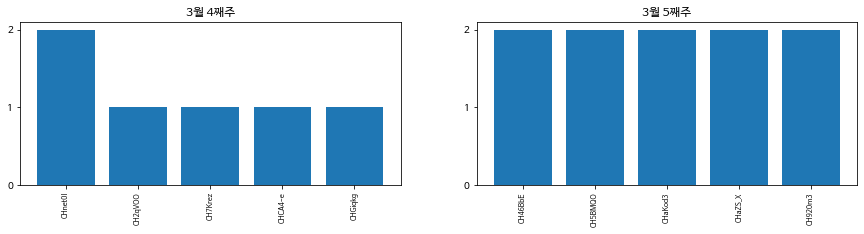

In [21]:
week_graph(3)

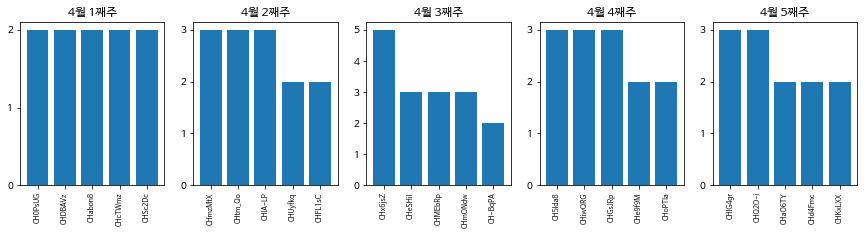

In [22]:
week_graph(4)

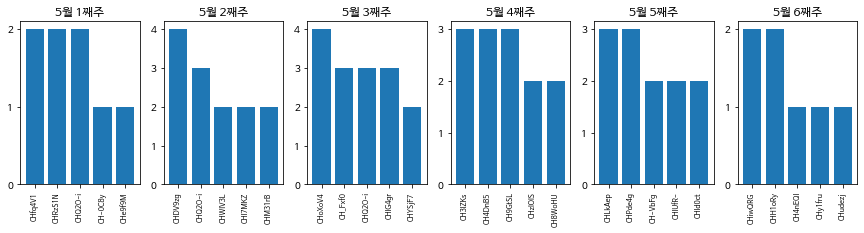

In [23]:
week_graph(5)

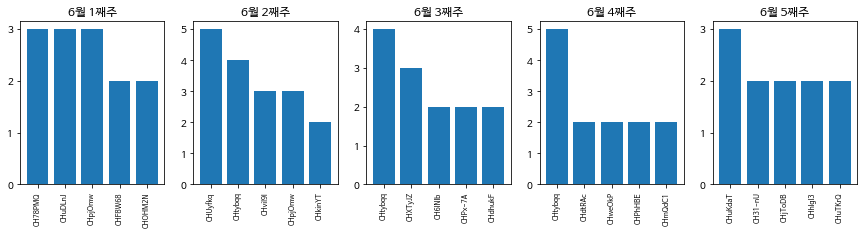

In [24]:
week_graph(6)

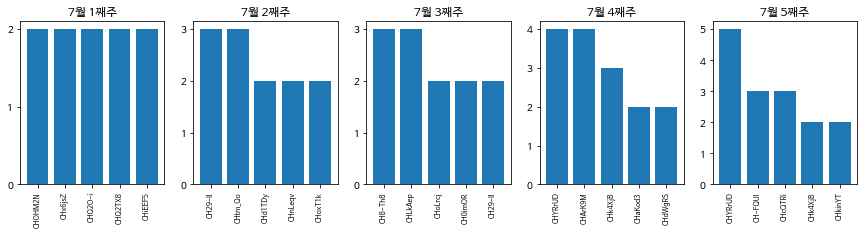

In [25]:
week_graph(7)

In [26]:
# 월별 카테고리별 태그 키워드 순위
# "|" 으로 구분되어 있는 단어 나누기
def func(text):
  if type(text) == str:
    text = text.replace('#', '')
    text = text.split("|")
  
  return text

In [27]:
df['tags'] = df['tags'].apply(func)

In [28]:
def category_tag(month):
  data = df[df['month'] == month].dropna(subset=['tags'])   # 월별로 tags가 없는 항목 제거
  print(f"{month}월")
  for category in data['category_name'].unique():
    top = {}
    for tags in data[data['category_name'] == category]['tags']: 
      for tag in tags:
        if tag not in top:
          top[tag] = 1
        else:
          top[tag] += 1
    print(category, "-", sorted(top.items(), key = lambda item : item[1], reverse=True))

In [29]:
category_tag(3)

3월
Entertainment - [('유재석', 4), ('KBS', 4), ('아이유', 3), ('kbs', 3), ('eng', 3), ('idol', 3), ('몰카', 3), ('라일락', 2), ('IU', 2), ('LILAC', 2), ('런닝맨', 2), ('김종국', 2), ('이광수', 2), ('지석진', 2), ('하하', 2), ('송지효', 2), ('전소민', 2), ('양세찬', 2), ('runningman', 2), ('RunninMan', 2), ('SBS', 2), ('sbs', 2), ('Kim Jong Kook', 2), ('Lee Kwang Soo', 2), ('Ji Seok Jin', 2), ('Yoo Jae Suk', 2), ('Song Ji Hyo', 2), ('Haha', 2), ('Gary', 2), ('Yang Se Chan', 2), ('Jeon So Min', 2), ('신규진', 2), ('김보성', 2), ('의리', 2), ('뒷머리', 2), ('핫이슈', 2), ('유퀴즈', 2), ('유퀴즈온더블럭', 2), ('조세호', 2), ('먹방', 2), ('kbsworld', 2), ('kbs world', 2), ('韓流', 2), ('放送', 2), ('韩国综艺', 2), ('韩国电视剧', 2), ('truyền hình Hàn Quốc', 2), ('ประเทศเกาหลีใต้', 2), ('ละคร', 2), ('Corea', 2), ('Corée', 2), ('دراما', 2), ('دراما كورية', 2), ('kbskpop', 2), ('yt:cc=on', 2), ('kpop', 2), ('KBSWorld', 2), ('Korea', 2), ('Korean', 2), ('Drama', 2), ('K-Pop', 2), ('Entertainment', 2), ('Documentary', 2), ('Music', 2), ('Bank', 2), ('영어자막', 2), ('Englis

In [30]:
category_tag(4)

4월
Entertainment - [('예능', 24), ('먹방', 22), ('브레이브걸스', 20), ('롤린', 19), ('유재석', 18), ('쁘걸', 17), ('유나', 17), ('유정', 16), ('민영', 16), ('은지', 15), ('SBS', 14), ('레전드', 13), ('메보좌', 13), ('꼬북좌', 13), ('왕눈좌', 13), ('단발좌', 12), ('여사친', 11), ('김태호', 11), ('역주행', 10), ('놀면뭐하니', 10), ('운전만해', 9), ('브브걸', 9), ('tvN', 9), ('mukbang', 8), ('아프리카TV', 8), ('BJ', 8), ('용감한형제', 8), ('용형', 8), ('kpop', 8), ('아이돌', 7), ('개그', 7), ('코빅', 7), ('코미디빅리그', 7), ('여캠', 7), ('꿀잼', 7), ('민호', 7), ('역대급', 7), ('런닝맨', 7), ('무도', 7), ('임영웅', 7), ('이효리', 7), ('커플', 7), ('싱어게인', 7), ('아이유', 7), ('엄정화', 7), ('지미유', 7), ('예고', 6), ('재미', 6), ('맛집', 6), ('UDT', 6), ('SG워너비', 6), ('이석훈', 6), ('파뿌리', 6), ('브레이브걸스 롤린', 6), ('Rollin', 6), ('깨박이', 6), ('우결', 6), ('VLOG', 6), ('하하', 6), ('sbs', 6), ('놀뭐', 6), ('Brave Girls', 6), ('드라마', 6), ('남사친', 6), ('여친', 6), ('장성규', 6), ('몰카', 6), ('MBC', 6), ('버라이어티', 6), ('웹예능', 6), ('정재형', 6), ('연애', 6), ('여자친구', 6), ('IU', 6), ('유희열', 6), ('제시', 6), ('환불원정대', 6), ('화사', 6), ('음식', 5

In [31]:
category_tag(5)

5월
Science & Technology - [('애플', 3), ('shorts', 2), ('아이맥', 2), ('apple', 2), ('아이패드 프로 12.9', 2), ('귀상어', 1), ('머리', 1), ('상어', 1), ('진화', 1), ('부력', 1), ('로렌치니기관', 1), ('스토리', 1), ('STORY', 1), ('유튜브', 1), ('유튜버', 1), ('댓글', 1), ('이모티콘', 1), ('기능', 1), ('꿀팁', 1), ('조회수', 1), ('구독자', 1), ('짧은 동영상', 1), ('틱톡', 1), ('TMI', 1), ('사실', 1), ('상식', 1), ('모음', 1), ('카카오톡', 1), ('카톡', 1), ('방법', 1), ('채널', 1), ('이름', 1), ('해킹', 1), ('팩토리', 1), ('FACTORY', 1), ('리뷰엉이', 1), ('과학', 1), ('과학유튜버', 1), ('과학채널', 1), ('우주선', 1), ('로켓', 1), ('핵연료', 1), ('원자력', 1), ('핵우주선', 1), ('핵추진우주선', 1), ('원자력우주선', 1), ('원자력 로켓', 1), ('잇섭', 1), ('잇섭 아이맥', 1), ('애플 아이맥', 1), ('애플 아이맥 M1', 1), ('애플 m1', 1), ('m1', 1), ('imac m1', 1), ('apple imac', 1), ('apple imac unboxing', 1), ('itsub', 1), ('itsub imac', 1), ('desktop', 1), ('apple desktop', 1), ('unboxing', 1), ('imac unboxing', 1), ('잇섭 애플', 1), ('Samsung', 1), ('아이맥 M1', 1), ('아이맥 언빡싱', 1), ('아이맥 M1 언빡싱', 1), ('iMac M1', 1), ('언박싱', 1), ('신상 아이맥', 1), ('애플 신

In [32]:
category_tag(6)

6월
Entertainment - [('먹방', 28), ('예능', 20), ('레전드', 15), ('SBS', 15), ('유재석', 13), ('kpop', 12), ('개그', 11), ('아이돌', 10), ('하하', 10), ('mukbang', 10), ('브레이브걸스', 9), ('tvN', 9), ('음악', 8), ('아프리카', 8), ('커플', 8), ('파뿌리', 8), ('idol', 7), ('쁘걸', 7), ('역대급', 7), ('Diggle', 7), ('디글', 7), ('예고', 7), ('김종국', 7), ('지석진', 7), ('양세찬', 7), ('런닝맨', 7), ('게임', 7), ('직캠', 7), ('다현', 7), ('리뷰', 7), ('재미', 7), ('사랑', 7), ('연애', 7), ('라이브', 6), ('송지효', 6), ('이광수', 6), ('전소민', 6), ('모음', 6), ('가족시트콤', 6), ('댄스', 6), ('웹드라마', 6), ('웃긴', 6), ('엠카운트다운', 6), ('엠카', 6), ('홍현희', 6), ('천뚱', 6), ('장항준', 6), ('엽캠', 6), ('이수근', 6), ('치맛바람', 6), ('꿀잼', 6), ('윤종신', 5), ('이지아', 5), ('무대', 5), ('민영', 5), ('유정', 5), ('은지', 5), ('유나', 5), ('문명특급', 5), ('스브스뉴스', 5), ('재재', 5), ('문특', 5), ('mmtg', 5), ('runningman', 5), ('요리', 5), ('트와이스', 5), ('사나', 5), ('웃음', 5), ('고기', 5), ('웹예능', 5), ('love', 5), ('couple', 5), ('여사친', 5), ('남사친', 5), ('장성규', 5), ('Kpop', 5), ('강호동', 5), ('P.O', 5), ('브이로그', 5), ('Brave Girls', 4)

In [33]:
category_tag(7)

7월
Entertainment - [('유재석', 19), ('예능', 17), ('SBS', 14), ('런닝맨', 13), ('먹방', 12), ('레전드', 11), ('kpop', 10), ('하하', 10), ('tvN', 9), ('Diggle', 8), ('디글', 8), ('연애', 8), ('이광수', 8), ('Runningman', 8), ('예능맛ZIP', 8), ('김종국', 8), ('전소민', 8), ('이수근', 8), ('드라마', 7), ('여사친', 7), ('남친', 7), ('여친', 7), ('사랑', 7), ('여름', 7), ('지석진', 7), ('리뷰', 6), ('무도', 6), ('제시', 6), ('웹드라마', 6), ('남사친', 6), ('유퀴즈', 6), ('유퀴즈온더블럭', 6), ('웹예능', 6), ('놀면뭐하니', 6), ('양세찬', 6), ('송지효', 6), ('강호동', 6), ('kdrama', 5), ('영화', 5), ('파뿌리', 5), ('요리', 5), ('승우아빠', 5), ('강아지', 5), ('love', 5), ('식스센스', 5), ('역대급', 5), ('Lee Kwang Soo', 5), ('피오', 5), ('박명수', 5), ('슈퍼주니어', 5), ('정형돈', 5), ('서장훈', 5), ('엠넷', 4), ('코미디빅리그', 4), ('코빅', 4), ('환불원정대', 4), ('movie', 4), ('고등학교', 4), ('게임', 4), ('래퍼', 4), ('힙합', 4), ('커플', 4), ('남자친구', 4), ('여자친구', 4), ('couple', 4), ('korean', 4), ('혜리', 4), ('vlog', 4), ('브이로그', 4), ('예고', 4), ('육아', 4), ('JTBC', 4), ('스튜디오룰루랄라', 4), ('토크쇼', 4), ('허팝', 4), ('heopop', 4), ('gjvkq', 4), ('토크'

In [34]:
# Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표 들이 있음
# ex) views, likes, dislikes, comments,...
# 비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

"""
조회수
동영상 조회수 증가 속도(즉, '온도')
YouTube 외부를 포함하여 조회수가 발생하는 소스
동영상 업로드 기간
해당 동영상을 같은 채널에 최근 업로드한 다른 동영상과 비교한 결과
"""

df['term1'] = df['on_trending_date'] - df['published_date']

df[['on_rank', 'off_rank', 'description', 'on_views', 'on_likes', 'on_dislikes', 'term1', 'on_views', 'off_views','on_likes', 'off_likes']].head()

,on_rank,off_rank,description,on_views,on_likes,on_dislikes,term1,on_views,off_views,on_likes,off_likes
0,13,28,BTS performs their hit songs ‘Dynamite’ and ‘B...,1659484,270004,792,2 days,1659484,1912983,270004,282204
1,28,45,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,293559,7121,121,2 days,293559,374698,7121,8165
2,1,23,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",451260,3994,162,2 days,451260,757265,3994,5684
3,18,18,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,216446,1158,30,2 days,216446,216446,1158,1158
4,11,29,찾아 뵐 심판분들이 이제 18명정도 남았네요,631598,3839,112,2 days,631598,829677,3839,4494


In [49]:
# 총 조회수
df['engagement1'] = df['on_views']

# published_date(영상이 유튜브에 업로드된 날짜)부터 on_trending_date(인기 동영상에서 처음 포착된 날짜)사이에 받은 하루당 조회수
df['engagement2'] = (df['on_views'] / df['term1'].dt.days)

# 구독자수에 따른 조회수
df['engagement3'] = df['on_views'] / df['on_channel_subscribers']

# published_date(영상이 유튜브에 업로드된 날짜)부터 on_trending_date(인기 동영상에서 처음 포착된 날짜)사이에 받은 하루당 좋아요 + 싫어요수
# 싫어요수와 좋아요수를 합하여 지표 생성(싫어요도 결국 조회수로 이어지고 인기의 척도가 될 수 있음)
df['engagement4'] = (df['on_likes'] + df['on_dislikes']) // df['term1'].dt.days

In [62]:
# 주별로 인기순위를 집계
def new_engage(month):
  weeks = [j for i, j in df[df['month'] == month] .set_index('published_date').groupby(pd.Grouper(freq='W'))]

  for w, week in enumerate(weeks):
      week['rank1'] = week[['engagement1']].rank(method='dense', ascending=False)
      week['rank2'] = week[['engagement2']].rank(method='dense', ascending=False)
      week['rank3'] = week[['engagement3']].rank(method='dense', ascending=False)   # 구독자수에 비한 조회수는 중요도가 높다고 판단되어 순위에 가중치 0.7을 곱함
      week['rank4'] = week[['engagement4']].rank(method='dense', ascending=False)   # 좋아요 + 싫어요 수의 합계는 중요도가 낮다고 판단되어 순위에 가중치 1.2을 곱함
      week['RANK'] = (week['rank1'] + week['rank2'] + week['rank3']*0.7 + week['rank4']*1.2) / 4    # 4가지 지표의 평균 rank
      week[['on_rank', 'rank1', 'rank2', 'RANK']].sort_values(by='on_rank').plot(kind='bar', figsize=(20,5))
    

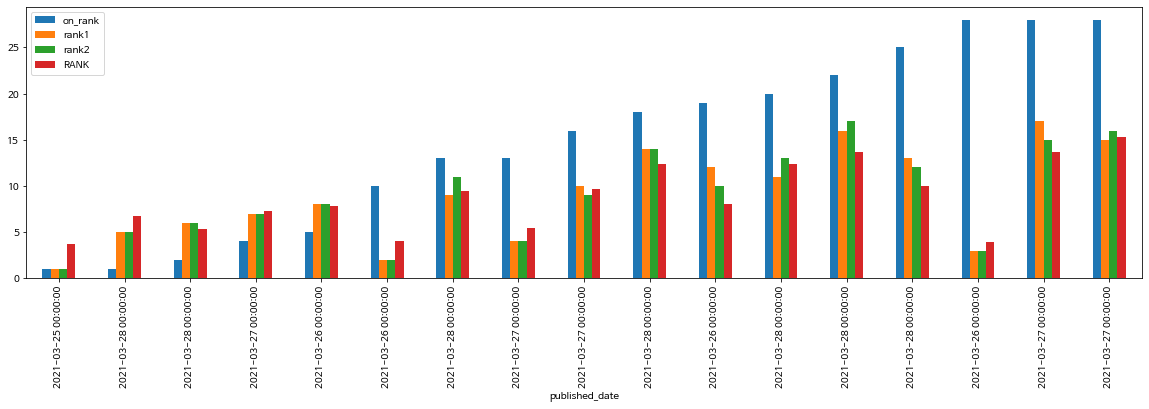

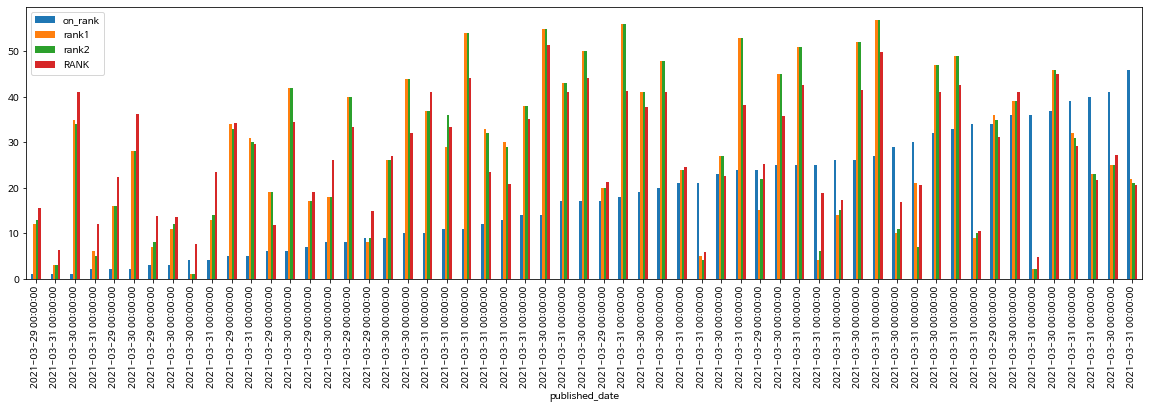

In [64]:
new_engage(3)

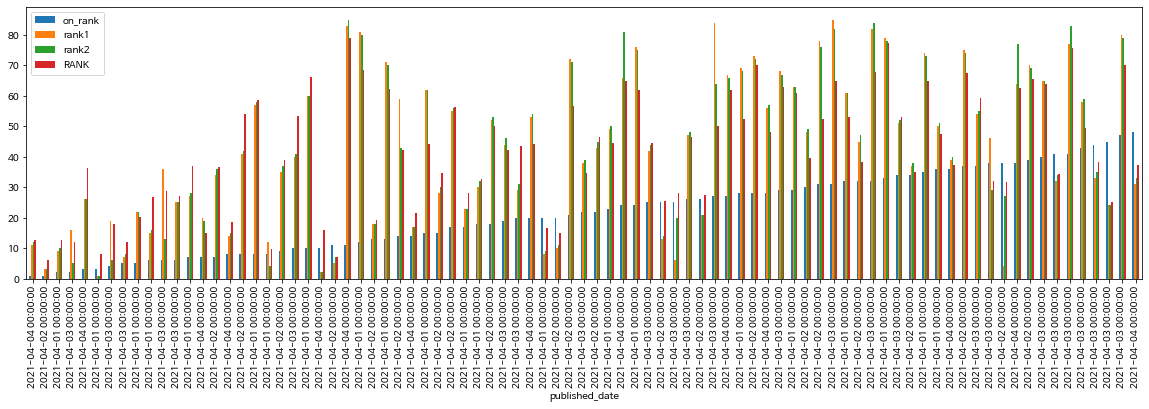

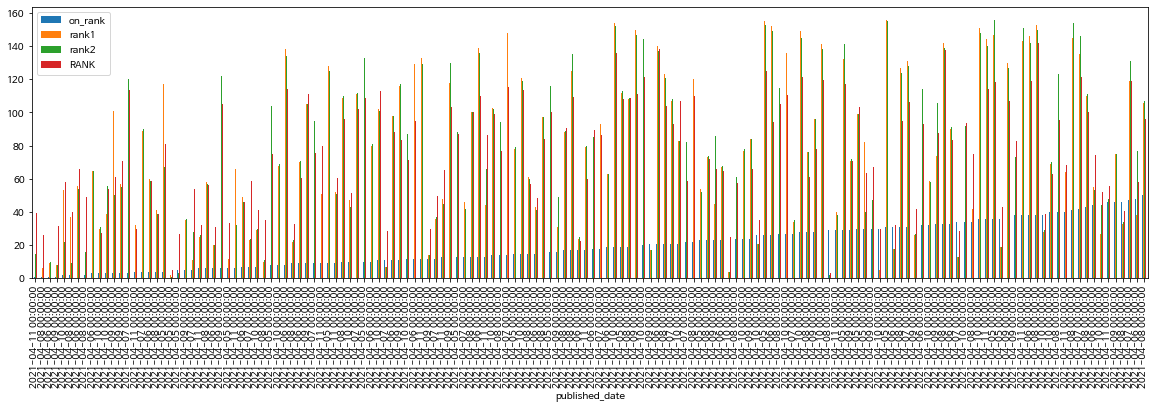

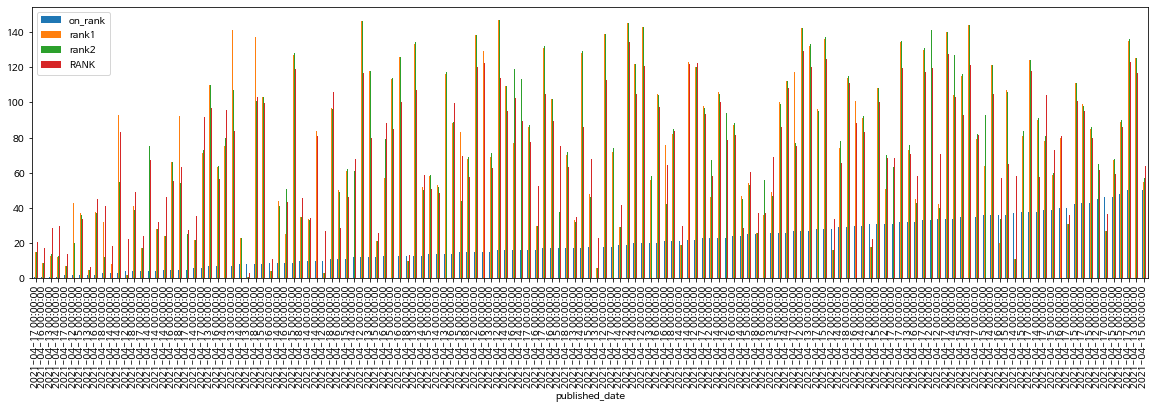

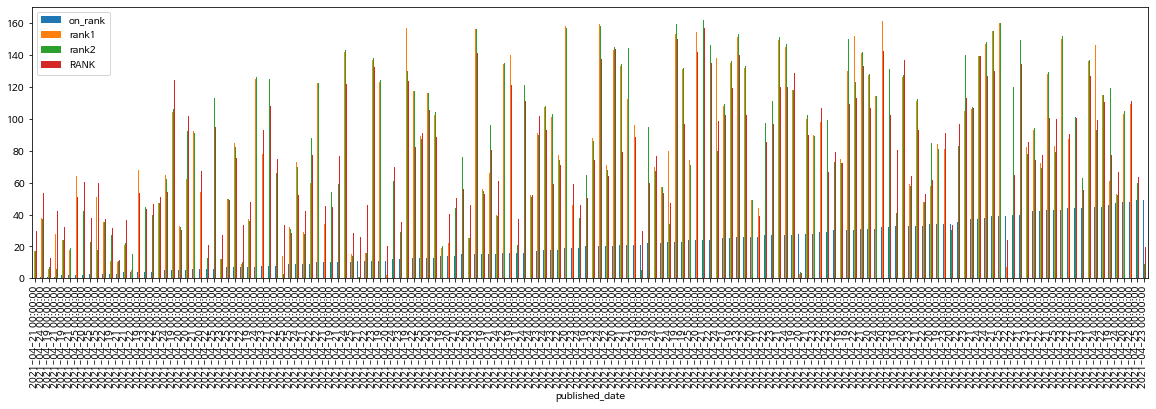

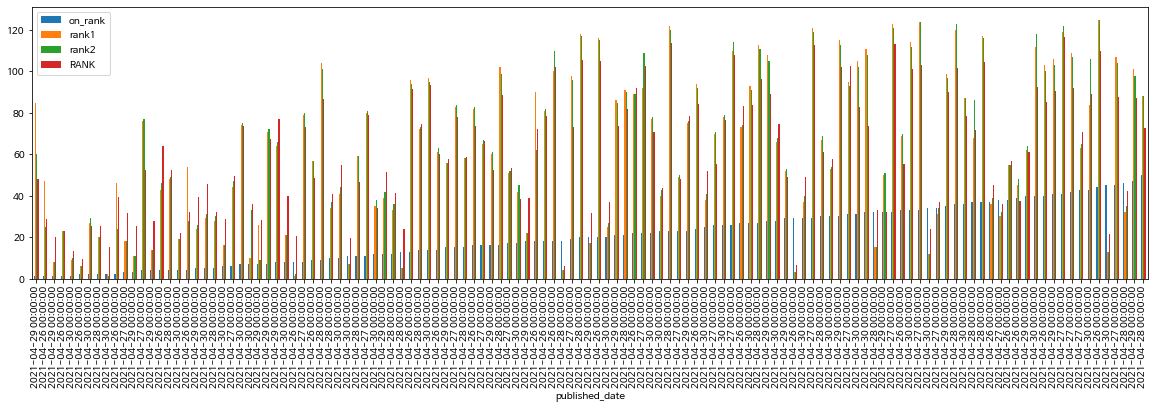

In [65]:
new_engage(4)

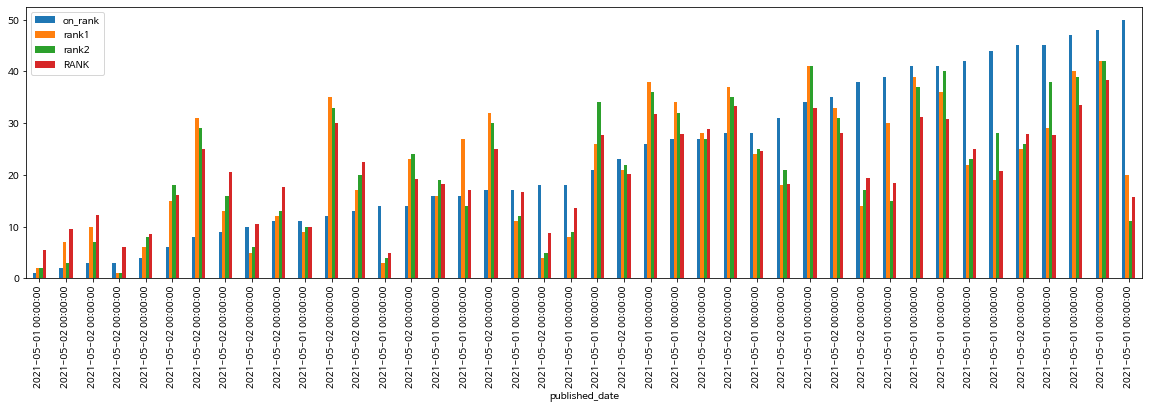

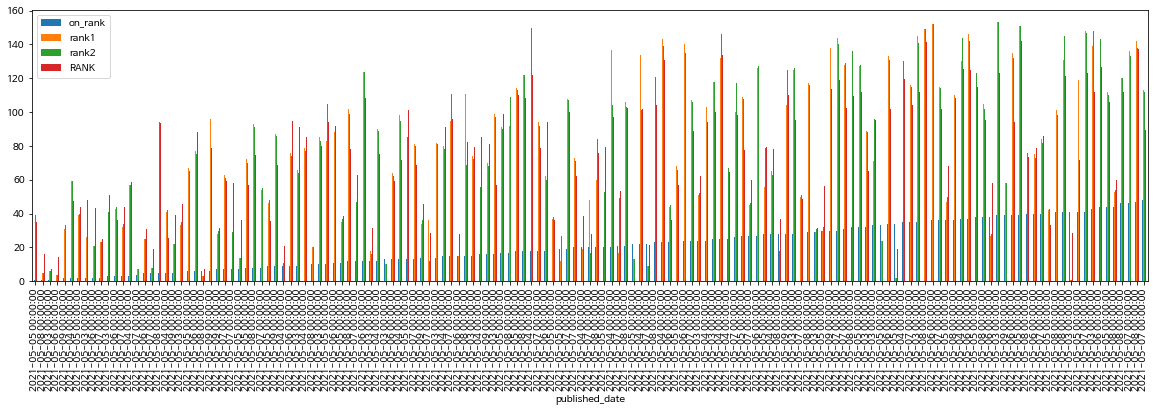

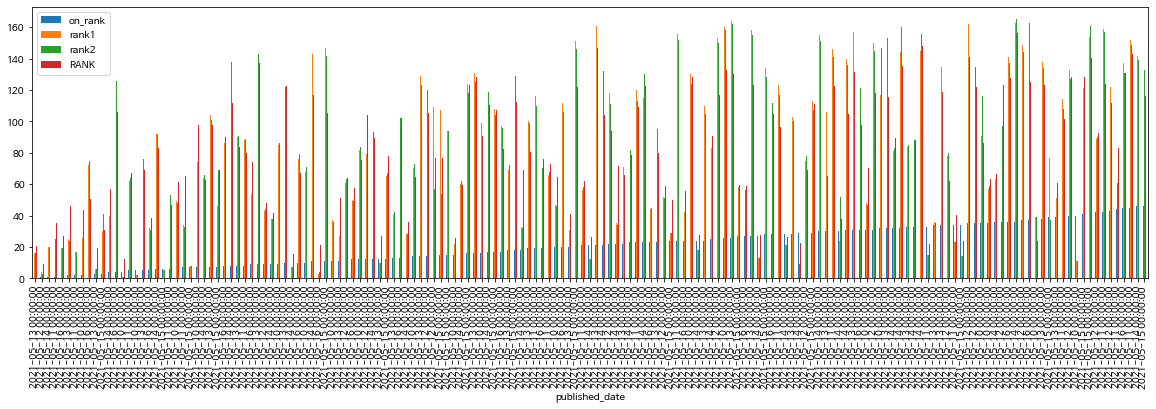

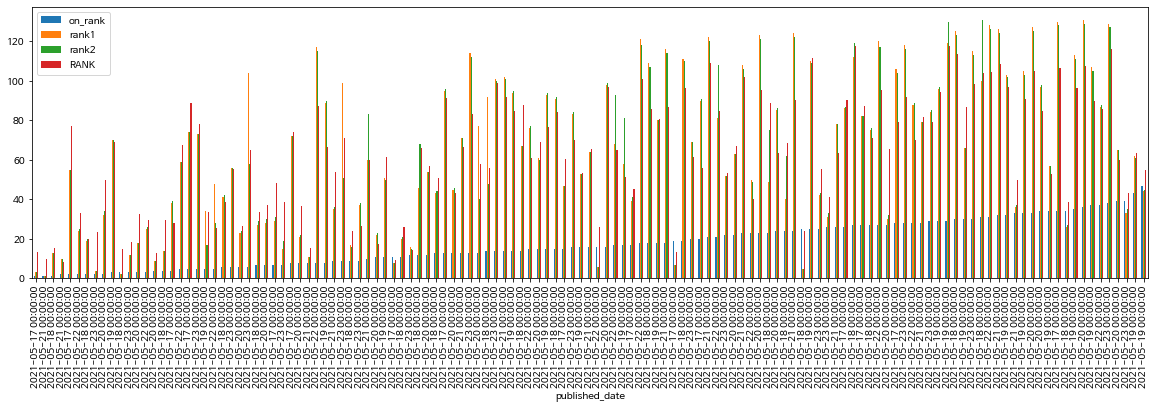

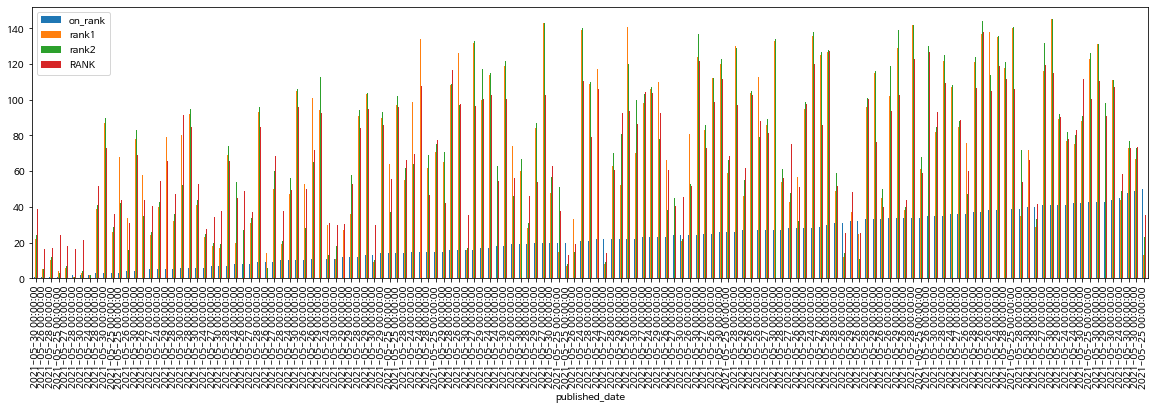

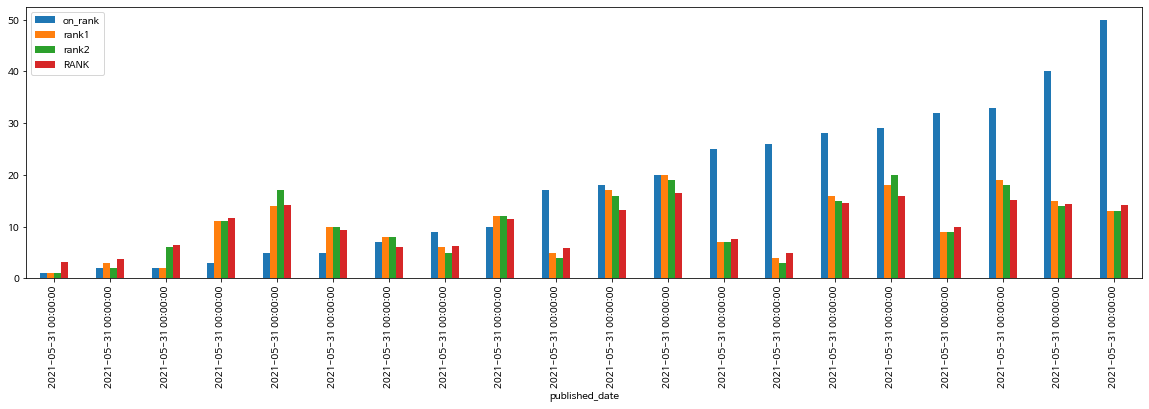

In [66]:
new_engage(5)

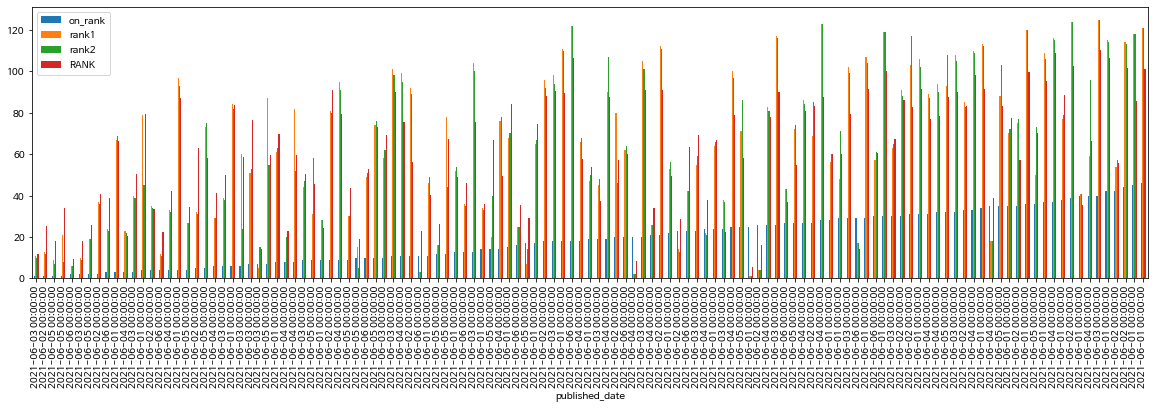

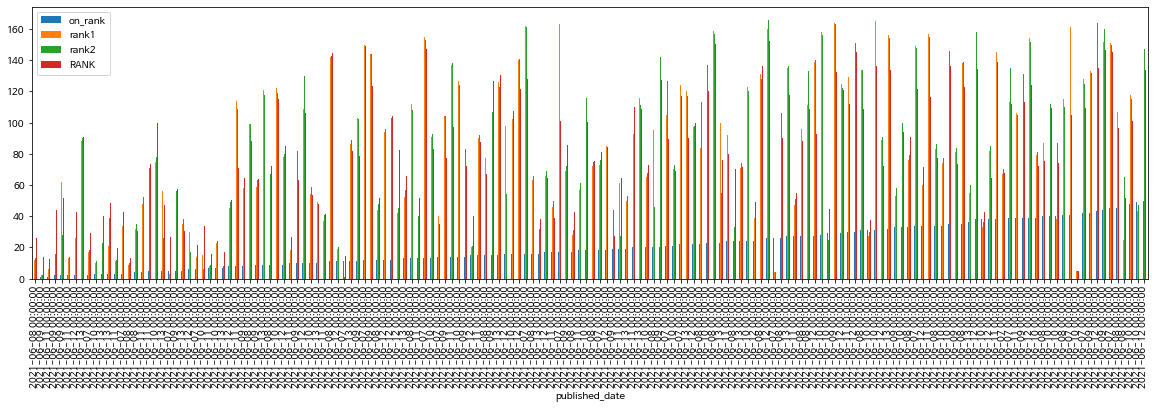

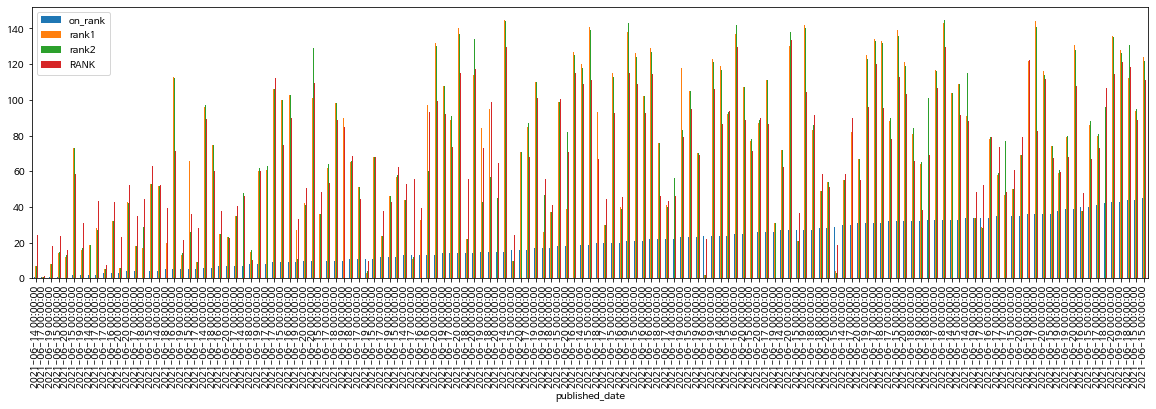

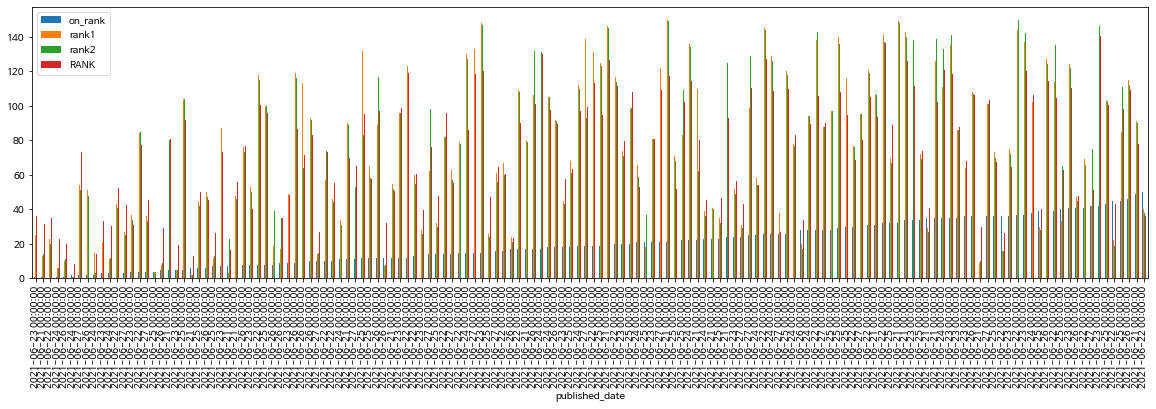

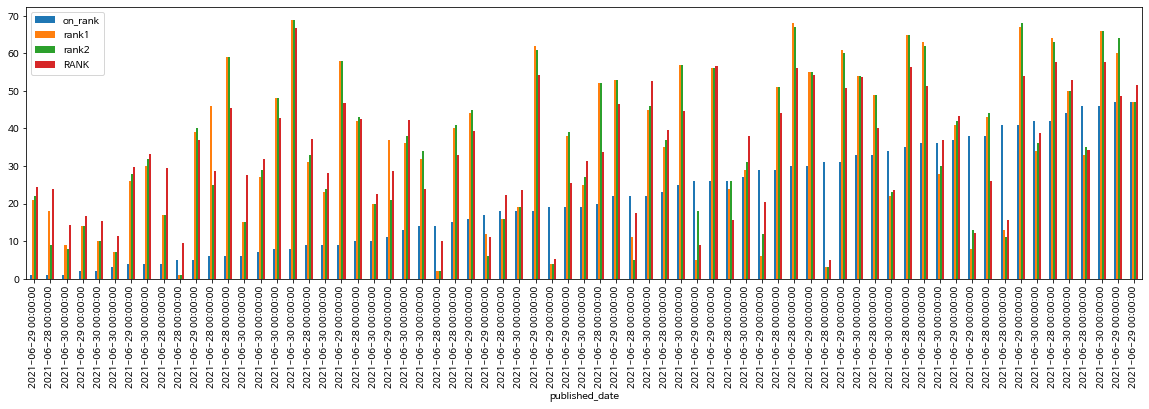

In [67]:
new_engage(6)

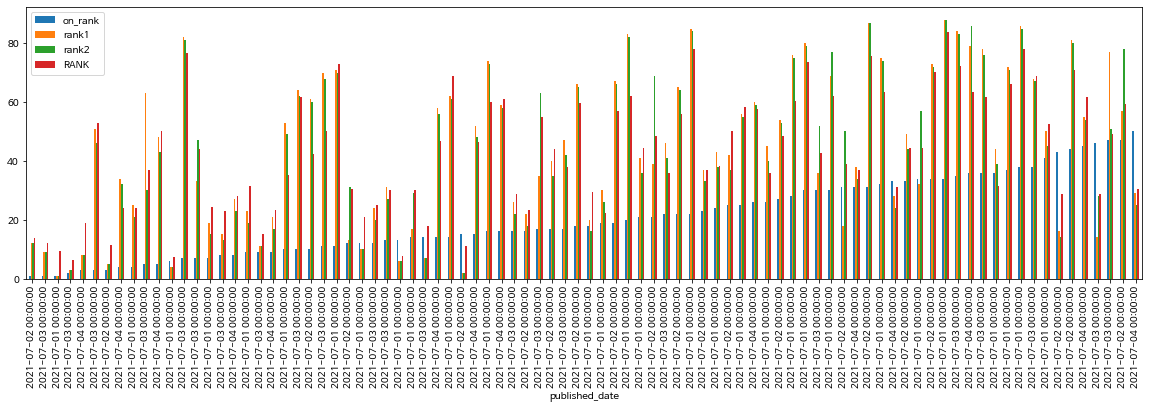

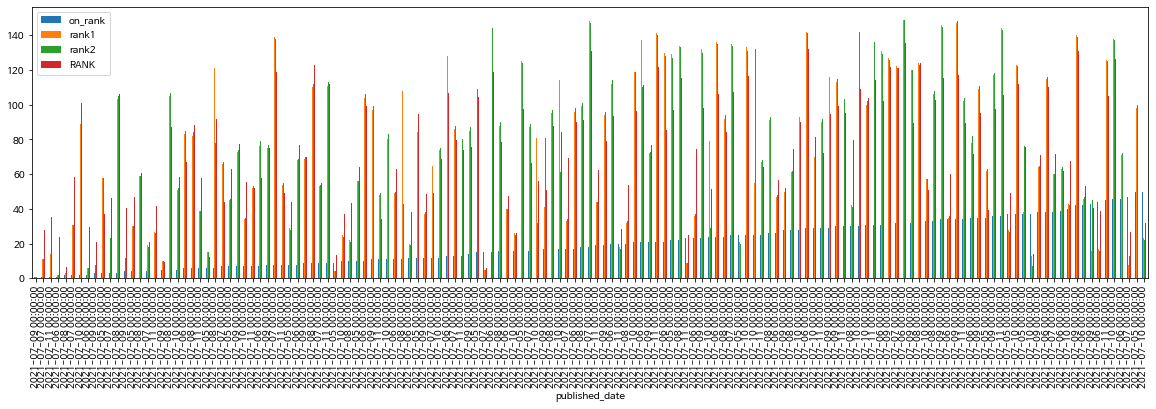

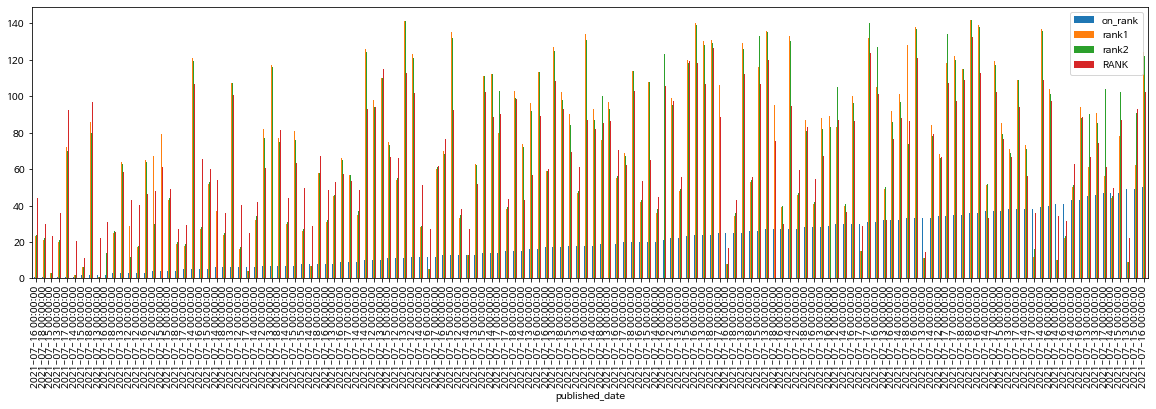

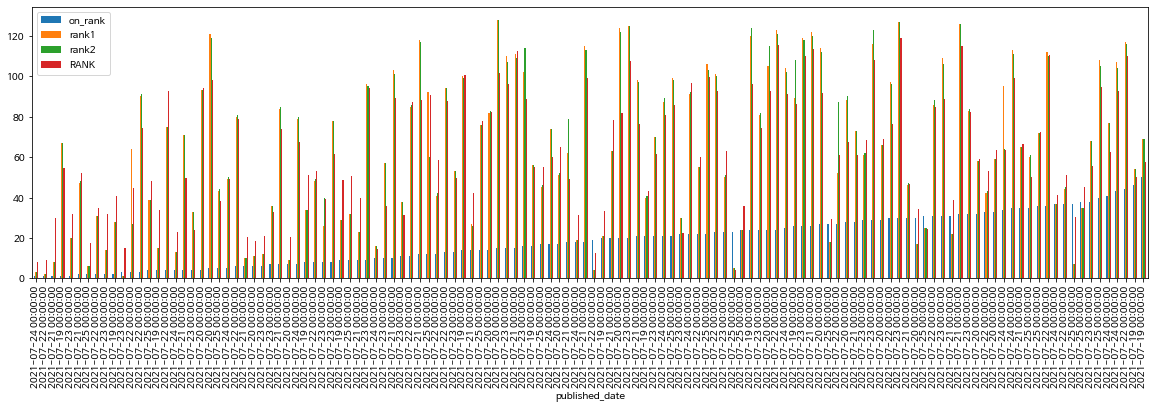

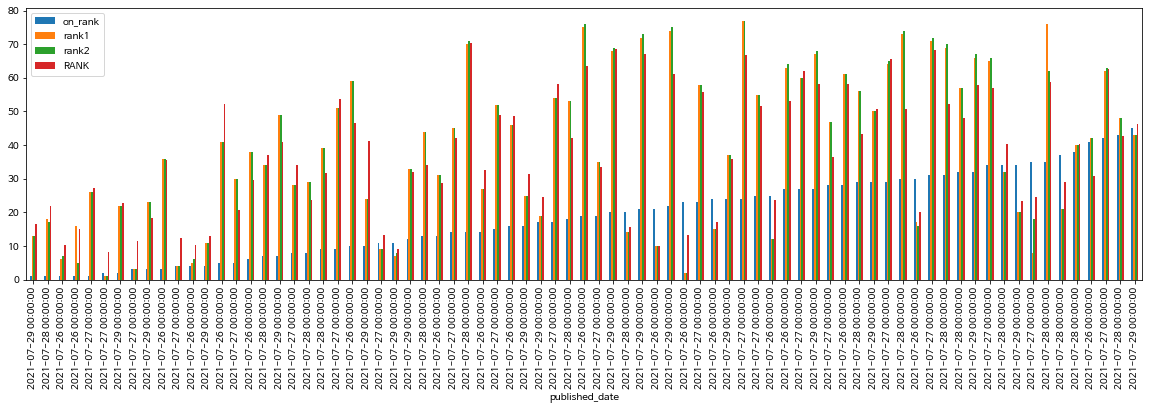

In [68]:
new_engage(7)